In [1732]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [1733]:

df=pd.read_excel('Data_Train.xlsx')

df.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [1734]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [1735]:
df.drop(['New_Price'],axis=1,inplace=True)

In [1736]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

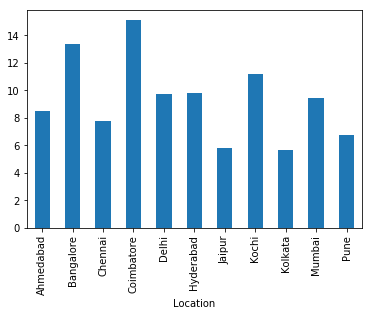

In [1737]:
df.groupby(['Location'])['Price'].mean().plot.bar()

In [1738]:
#df.dropna(inplace=True)



In [1739]:
df.Mileage.fillna('0.0 kmpl',inplace=True)

In [1740]:
df.Engine.fillna('0 CC',inplace=True)

In [1741]:
df.Power.fillna('0.0 bhp',inplace=True)

In [1742]:
df.Seats.fillna(0.0,inplace=True)

In [1743]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

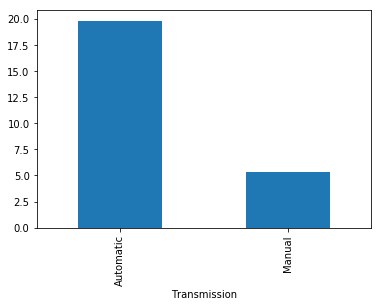

In [1744]:
df.groupby(['Transmission'])['Price'].mean().plot.bar()

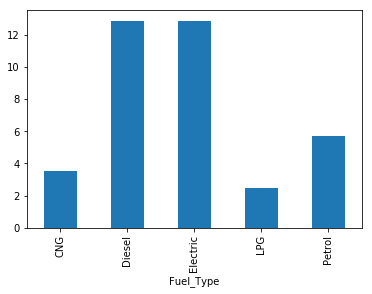

In [1745]:
df.groupby(['Fuel_Type'])['Price'].mean().plot.bar()

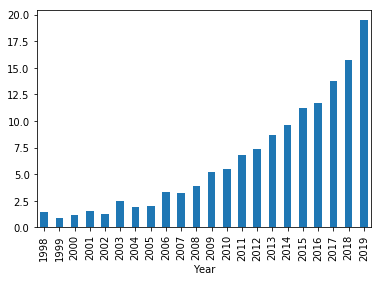

In [1746]:
df.groupby(['Year'])['Price'].mean().plot.bar()

In [1747]:
df.size

72228

In [1748]:
df.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [1749]:
df.Year.unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [1750]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [1751]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [1752]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [1753]:
df.Power=df.Power.apply(lambda x:x.split(' ')[0] if x is not 'null' else 0.00)

In [1754]:
df.Power.replace('null',0.00,inplace=True)

In [1755]:
#df.to_excel('tp1.xlsx')

In [1756]:
df.Power=df.Power.apply(lambda x: float(x))

In [1757]:
df.Engine=df.Engine.apply(lambda x:int(x.split(' ')[0]))
df.Mileage=df.Mileage.apply(lambda x:float(x.split(' ')[0]))
#df.Year=df.Year.astype('object')

In [1758]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


In [1759]:
'''
df['1990-1995']=df.Year.apply(lambda x:1 if x >= 1990 and x<=1995 else 0)

df['1995-2000']=df.Year.apply(lambda x:1 if x > 1995 and x<=2000 else 0)


df['2000-2005']=df.Year.apply(lambda x:1 if x > 2000 and x<=2005 else 0)


df['2005-2010']=df.Year.apply(lambda x:1 if x > 2005 and x<=2010 else 0)


df['2010-2015']=df.Year.apply(lambda x:1 if x > 2010 and x<=2015 else 0)

df['2015-2020']=df.Year.apply(lambda x:1 if x >2015 and x<=2020 else 0)

'''

"\ndf['1990-1995']=df.Year.apply(lambda x:1 if x >= 1990 and x<=1995 else 0)\n\ndf['1995-2000']=df.Year.apply(lambda x:1 if x > 1995 and x<=2000 else 0)\n\n\ndf['2000-2005']=df.Year.apply(lambda x:1 if x > 2000 and x<=2005 else 0)\n\n\ndf['2005-2010']=df.Year.apply(lambda x:1 if x > 2005 and x<=2010 else 0)\n\n\ndf['2010-2015']=df.Year.apply(lambda x:1 if x > 2010 and x<=2015 else 0)\n\ndf['2015-2020']=df.Year.apply(lambda x:1 if x >2015 and x<=2020 else 0)\n\n"

In [1760]:
df.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [1761]:
from sklearn.feature_extraction.text import CountVectorizer
#cv1=CountVectorizer(ngram_range=(1,3),max_features=500)-84%
#cv1=CountVectorizer(ngram_range=(1,3),max_features=500)
#cv1=CountVectorizer(max_features=300,ngram_range=(2,3))-91%

cv1=CountVectorizer(max_features=500,ngram_range=(2,3))
cv1.fit(df.Name)
x1=cv1.transform(df.Name)

In [1762]:
d1=cv1.vocabulary_

In [1763]:
type(d1)

dict

In [1764]:
sorted(d1,key=d1.get,reverse=True)

['zdi plus',
 'xuv500 w8 2wd',
 'xuv500 w8',
 'xuv500 w10',
 'xing gls',
 'xf litre',
 'xdrive 30d',
 'xcent kappa',
 'xcent crdi',
 'wagon vxi',
 'wagon lxi cng',
 'wagon lxi',
 'w8 2wd',
 'vxi bsiv',
 'vxi bsiii',
 'vxi at',
 'vx dtec',
 'vx diesel seater',
 'vx diesel',
 'vtec vx',
 'vtec cvt vx',
 'vtec cvt',
 'volkswagen vento tdi',
 'volkswagen vento petrol',
 'volkswagen vento diesel',
 'volkswagen vento',
 'volkswagen polo tdi',
 'volkswagen polo petrol',
 'volkswagen polo mpi',
 'volkswagen polo diesel',
 'volkswagen polo',
 'volkswagen jetta',
 'volkswagen ameo',
 'vitara brezza zdi',
 'vitara brezza',
 'verna vtvt',
 'verna sx vtvt',
 'verna sx crdi',
 'verna sx',
 'verna crdi sx',
 'verna crdi',
 'vento tdi highline',
 'vento tdi',
 'vento petrol highline',
 'vento petrol',
 'vento diesel highline',
 'vento diesel',
 'vdi bsiv',
 'tsi at',
 'trendline 2l',
 'toyota innova vx',
 'toyota innova gx',
 'toyota innova diesel',
 'toyota innova crysta',
 'toyota innova',
 'toyota 

In [1765]:
x1

<6019x500 sparse matrix of type '<class 'numpy.int64'>'
	with 19196 stored elements in Compressed Sparse Row format>

In [1766]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
vect.fit(df.Name)
x1=vect.transform(df.Name)
'''

'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nvect=TfidfVectorizer()\nvect.fit(df.Name)\nx1=vect.transform(df.Name)\n'

In [1767]:
df.shape

(6019, 12)

In [1768]:
y=df.Price.values

In [1769]:
#df.drop(['Price','Name','Year'],axis=1,inplace=True)
df.drop(['Price','Name'],axis=1,inplace=True)

In [1770]:
df=pd.get_dummies(df)

In [1771]:
x2=df.values

In [1772]:
x2.shape

(6019, 28)

In [1773]:
x1.shape

(6019, 500)

In [1774]:
X=np.concatenate([x1.toarray(),x2],axis=1)

In [1775]:


from sklearn.preprocessing import StandardScaler


In [1776]:
sc=StandardScaler()

In [1777]:
X=sc.fit_transform(X)

In [1778]:
X.shape

(6019, 528)

In [1779]:
from sklearn.model_selection import train_test_split

In [1780]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [1781]:

import lightgbm as lgb

In [1782]:
lg=lgb.LGBMRegressor()

In [1783]:
lg.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [1784]:
y_pred=lg.predict(X_test)

In [1785]:
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential

In [1786]:
model=Sequential()

In [1787]:
model.add(Dense(256,input_dim= 528,activation='relu'))

In [1788]:
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

In [1789]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse', 'mae', 'mape', 'cosine'])

In [1790]:
with tf.device('/GPU:0'):
    model.fit(X_train,y_train,epochs=100,batch_size=128,validation_data=[X_test,y_test])

Train on 4815 samples, validate on 1204 samples
Epoch 1/100
4815/4815 [==============================] - 2s 476us/step - loss: 118.8881 - mean_squared_error: 118.8881 - mean_absolute_error: 6.1007 - mean_absolute_percentage_error: 81.7496 - cosine_proximity: -0.8613 - val_loss: 57.1079 - val_mean_squared_error: 57.1079 - val_mean_absolute_error: 3.5817 - val_mean_absolute_percentage_error: 46.2340 - val_cosine_proximity: -1.0000
Epoch 2/100
4815/4815 [==============================] - 0s 69us/step - loss: 40.9903 - mean_squared_error: 40.9903 - mean_absolute_error: 3.1791 - mean_absolute_percentage_error: 41.9257 - cosine_proximity: -1.0000 - val_loss: 37.0699 - val_mean_squared_error: 37.0699 - val_mean_absolute_error: 2.7044 - val_mean_absolute_percentage_error: 28.3108 - val_cosine_proximity: -1.0000
Epoch 3/100
4815/4815 [==============================] - 0s 60us/step - loss: 30.4860 - mean_squared_error: 30.4860 - mean_absolute_error: 2.6157 - mean_absolute_percentage_error: 29.77

4815/4815 [==============================] - 0s 61us/step - loss: 7.0793 - mean_squared_error: 7.0793 - mean_absolute_error: 1.1649 - mean_absolute_percentage_error: 13.3526 - cosine_proximity: -1.0000 - val_loss: 15.8475 - val_mean_squared_error: 15.8475 - val_mean_absolute_error: 2.0429 - val_mean_absolute_percentage_error: 20.1303 - val_cosine_proximity: -1.0000
Epoch 44/100
4815/4815 [==============================] - 0s 59us/step - loss: 7.2677 - mean_squared_error: 7.2677 - mean_absolute_error: 1.1599 - mean_absolute_percentage_error: 13.1299 - cosine_proximity: -1.0000 - val_loss: 11.5592 - val_mean_squared_error: 11.5592 - val_mean_absolute_error: 1.5723 - val_mean_absolute_percentage_error: 15.8812 - val_cosine_proximity: -1.0000
Epoch 45/100
4815/4815 [==============================] - 0s 62us/step - loss: 6.6428 - mean_squared_error: 6.6428 - mean_absolute_error: 1.1781 - mean_absolute_percentage_error: 13.5882 - cosine_proximity: -1.0000 - val_loss: 14.7575 - val_mean_squar

4815/4815 [==============================] - 0s 60us/step - loss: 4.0640 - mean_squared_error: 4.0640 - mean_absolute_error: 0.9288 - mean_absolute_percentage_error: 11.0772 - cosine_proximity: -1.0000 - val_loss: 16.3233 - val_mean_squared_error: 16.3233 - val_mean_absolute_error: 2.0338 - val_mean_absolute_percentage_error: 19.5334 - val_cosine_proximity: -1.0000
Epoch 86/100
4815/4815 [==============================] - 0s 61us/step - loss: 3.8546 - mean_squared_error: 3.8546 - mean_absolute_error: 0.8675 - mean_absolute_percentage_error: 10.4917 - cosine_proximity: -1.0000 - val_loss: 15.6041 - val_mean_squared_error: 15.6041 - val_mean_absolute_error: 1.9445 - val_mean_absolute_percentage_error: 18.9022 - val_cosine_proximity: -1.0000
Epoch 87/100
4815/4815 [==============================] - 0s 60us/step - loss: 3.7234 - mean_squared_error: 3.7234 - mean_absolute_error: 0.8924 - mean_absolute_percentage_error: 10.5986 - cosine_proximity: -1.0000 - val_loss: 15.2231 - val_mean_squar

In [1791]:
y_pr=model.predict(X_test)

In [1792]:
mean_squared_error(y_pr,y_test)

16.146960525595937

In [1793]:
r2_score(y_pred,y_test)

0.909954714384981

In [1794]:
import xgboost as xgb

In [1795]:
xg=xgb.XGBRegressor()

In [1796]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [1797]:
y_pr2=xg.predict(X_test)

In [1798]:
r2_score(y_pr2,y_test)

0.8686386461859421

In [1799]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,mean_squared_error,r2_score

In [1800]:
y_test

array([ 4.9 , 24.75,  8.25, ...,  3.99,  7.5 ,  8.31])

In [1801]:
mean_absolute_error(y_pred,y_test)

1.4598227073426724

In [1802]:
mean_squared_error(y_pred,y_test)

9.712242233581005

In [1803]:
r2_score(y_pred,y_test)

0.909954714384981

In [1804]:
1- 0.04

0.96

In [1805]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [1806]:
df1.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Fuel_Type_Electric'],
      dtype='object')

In [1807]:
df1=pd.read_excel('Data_Test.xlsx')

In [1808]:
df1.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [1809]:
df1.Location.unique()

array(['Delhi', 'Coimbatore', 'Mumbai', 'Hyderabad', 'Pune', 'Jaipur',
       'Chennai', 'Kochi', 'Bangalore', 'Kolkata', 'Ahmedabad'],
      dtype=object)

In [1810]:
df1.Year.unique()

array([2014, 2013, 2017, 2012, 2016, 2015, 2011, 2007, 2008, 2009, 2019,
       2010, 2005, 2006, 2018, 2003, 1996, 2004, 2002, 2000], dtype=int64)

In [1811]:
df1.Fuel_Type.unique()

array(['CNG', 'Petrol', 'Diesel', 'LPG'], dtype=object)

In [1812]:
df1.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [1813]:
df1.Owner_Type.unique()

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [1814]:
df1.Fuel_Type.unique()

array(['CNG', 'Petrol', 'Diesel', 'LPG'], dtype=object)

In [1815]:
df1.drop(['New_Price'],axis=1,inplace=True)
df1.Mileage.fillna('0.0 kmpl',inplace=True)
df1.Engine.fillna('0 CC',inplace=True)

df1.Power.fillna('0.0 bhp',inplace=True)
df1.Seats.fillna(0.0,inplace=True)

df1.Power=df1.Power.apply(lambda x:x.split(' ')[0] if x is not 'null' else 0.00)

df1.Power.replace('null',0.00,inplace=True)

df1.Power=df1.Power.apply(lambda x: float(x))

df1.Engine=df1.Engine.apply(lambda x:int(x.split(' ')[0]))
df1.Mileage=df1.Mileage.apply(lambda x:float(x.split(' ')[0]))

'''

df1['1990-1995']=df1.Year.apply(lambda x:1 if x >= 1990 and x<=1995 else 0)

df1['1995-2000']=df1.Year.apply(lambda x:1 if x > 1995 and x<=2000 else 0)


df1['2000-2005']=df1.Year.apply(lambda x:1 if x > 2000 and x<=2005 else 0)


df1['2005-2010']=df1.Year.apply(lambda x:1 if x > 2005 and x<=2010 else 0)


df1['2010-2015']=df1.Year.apply(lambda x:1 if x > 2010 and x<=2015 else 0)

df1['2015-2020']=df1.Year.apply(lambda x:1 if x >2015 and x<=2020 else 0)
'''


"\n\ndf1['1990-1995']=df1.Year.apply(lambda x:1 if x >= 1990 and x<=1995 else 0)\n\ndf1['1995-2000']=df1.Year.apply(lambda x:1 if x > 1995 and x<=2000 else 0)\n\n\ndf1['2000-2005']=df1.Year.apply(lambda x:1 if x > 2000 and x<=2005 else 0)\n\n\ndf1['2005-2010']=df1.Year.apply(lambda x:1 if x > 2005 and x<=2010 else 0)\n\n\ndf1['2010-2015']=df1.Year.apply(lambda x:1 if x > 2010 and x<=2015 else 0)\n\ndf1['2015-2020']=df1.Year.apply(lambda x:1 if x >2015 and x<=2020 else 0)\n"

In [1816]:
x1=cv1.transform(df1.Name)

#df1.drop(['Name','Year'],axis=1,inplace=True)
df1.drop(['Name'],axis=1,inplace=True)
df1=pd.get_dummies(df1)

In [1817]:
df1.shape

(1234, 27)

In [1818]:
df1['Owner_Type_Fourth & Above']=0.0

df1['Fuel_Type_Electric']=0.0

In [1819]:
#df1['Year_2018']=0.0
#df1['Year_2019']=0.0


In [1820]:
df1.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Fuel_Type_Electric'],
      dtype='object')

In [1821]:
df1.shape

(1234, 28)

In [1822]:
x2=df1.values


In [1823]:
x2=df1.values

X=np.concatenate([x1.toarray(),x2],axis=1)



In [1824]:
x1.shape

(1234, 500)

In [1825]:
x2.shape

(1234, 28)

In [1826]:
X.shape

(1234, 528)

In [1827]:
X=sc.transform(X)

In [1828]:
y_prd=lg.predict(X)

In [1829]:
y_pr1=model.predict(X)

In [1830]:
y_pr1.reshape((-1))

array([ 3.2679324,  4.3998003, 14.180824 , ...,  3.216035 ,  2.888175 ,
       17.048336 ], dtype=float32)

In [1831]:
len(range(len(y_pr1)))

1234

In [1832]:
tp1=pd.DataFrame({'Price':y_pr1.reshape((-1))},index=range(len(y_pr1)))
tp1.to_excel('Submission1nn.xlsx')

In [1833]:
y_prd

array([ 4.55600476,  5.64873154, 19.88748425, ...,  5.16085823,
        4.23488799, 17.63501956])

In [1834]:
tp=pd.DataFrame({'Price':y_prd})

In [1835]:
tp.to_excel('Submission1.xlsx',index=False)